In [144]:
# IMPORT 
import pandas as pd
import matplotlib.pyplot as plt
import platform
import re

# FILE
WORLD='./Data_Aravis/FAOSTAT_data_7-20-2022.csv'        # https://www.fao.org/faostat/en/#data/FO


# READ
worldDF=pd.read_csv(WORLD)


In [145]:
# 플랫폼별 font 설정
if(platform.system() == 'Windows'):
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

In [146]:
worldDF.head()

,Domain,Area,Element,Item,Year,Value
0,Forestry Production and Trade,World,Production,"Sawlogs and veneer logs, coniferous",2018,776211022
1,Forestry Production and Trade,World,Production,"Sawlogs and veneer logs, coniferous",2019,750653711
2,Forestry Production and Trade,World,Production,"Sawlogs and veneer logs, coniferous",2020,755319098
3,Forestry Production and Trade,World,Production,"Sawlogs and veneer logs, non-coniferous",2018,402730622
4,Forestry Production and Trade,World,Production,"Sawlogs and veneer logs, non-coniferous",2019,396161413


In [147]:
# 불필요한 컬럼 삭제
worldDF.drop('Domain', axis=1, inplace=True)
worldDF.head()

,Area,Element,Item,Year,Value
0,World,Production,"Sawlogs and veneer logs, coniferous",2018,776211022
1,World,Production,"Sawlogs and veneer logs, coniferous",2019,750653711
2,World,Production,"Sawlogs and veneer logs, coniferous",2020,755319098
3,World,Production,"Sawlogs and veneer logs, non-coniferous",2018,402730622
4,World,Production,"Sawlogs and veneer logs, non-coniferous",2019,396161413


### 유럽 수출량 변화 :

In [148]:
ElementDF=worldDF.groupby('Element')
exportDF=ElementDF.get_group('Export Quantity')

exportDF.head()

,Area,Element,Item,Year,Value
15,World,Export Quantity,"Sawnwood, coniferous",2018,133685613
16,World,Export Quantity,"Sawnwood, coniferous",2019,133592781
17,World,Export Quantity,"Sawnwood, coniferous",2020,131041924
30,World,Export Quantity,"Sawnwood, non-coniferous all",2018,25794801
31,World,Export Quantity,"Sawnwood, non-coniferous all",2019,23894439


In [149]:
export_EruopeDF=exportDF[exportDF['Area']=='Europe']
export_EruopeDF.index=list(range(len(export_EruopeDF.index)))
export_EruopeDF

,Area,Element,Item,Year,Value
0,Europe,Export Quantity,"Sawnwood, coniferous",2018,90182878
1,Europe,Export Quantity,"Sawnwood, coniferous",2019,93609571
2,Europe,Export Quantity,"Sawnwood, coniferous",2020,93801520
3,Europe,Export Quantity,"Sawnwood, non-coniferous all",2018,8679506
4,Europe,Export Quantity,"Sawnwood, non-coniferous all",2019,8379640
5,Europe,Export Quantity,"Sawnwood, non-coniferous all",2020,7724015
6,Europe,Export Quantity,Plywood,2018,7657409
7,Europe,Export Quantity,Plywood,2019,7573316
8,Europe,Export Quantity,Plywood,2020,7555994
9,Europe,Export Quantity,Particle board,2018,16173912


In [158]:
export_EruopeDF.iloc[3]['Value']

8679506

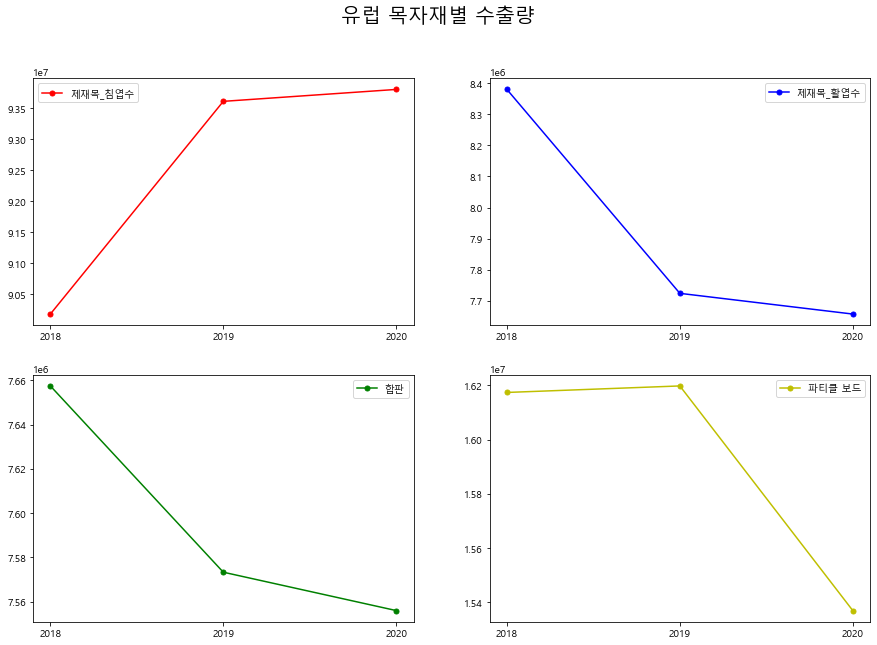

In [160]:
SW_c=[export_EruopeDF.iloc[0]['Value'], export_EruopeDF.iloc[1]['Value'], export_EruopeDF.iloc[2]['Value']]
SW_nc=[export_EruopeDF.iloc[4]['Value'], export_EruopeDF.iloc[5]['Value'], export_EruopeDF.iloc[6]['Value']]
PLY=[export_EruopeDF.iloc[6]['Value'], export_EruopeDF.iloc[7]['Value'], export_EruopeDF.iloc[8]['Value']]
PB=[export_EruopeDF.iloc[9]['Value'], export_EruopeDF.iloc[10]['Value'], export_EruopeDF.iloc[11]['Value']]

fig, ax1 = plt.subplots(2,2, figsize=(15,10))
plt.suptitle('유럽 목자재별 수출량',fontsize=20)


# ax2.set_ylim(7000000, 10000000)
# ax3.set_ylim(7000000, 10000000)
# ax4.set_ylim(1700000, 20000000)

x_year=[2018,2019,2020]
plt.subplot(2,2,1)
plt.plot(x_year, SW_c,'ro-', ms=5, label='제재목_침엽수')
plt.xticks(x_year)
plt.legend()

plt.subplot(2,2,2)
plt.plot(x_year, SW_nc, 'bo-', ms=5,label='제재목_활엽수')
plt.xticks(x_year)
plt.legend()

plt.subplot(2,2,3)
plt.plot(x_year, PLY,'go-', ms=5, label='합판')
plt.xticks(x_year)
plt.legend()

plt.subplot(2,2,4)
plt.plot(x_year, PB,'yo-', ms=5, label='파티클 보드')
plt.xticks(x_year)
plt.legend()

plt.show()